### 2018/2019 - Task List 3

1. Create simple pyro model, that models any real life situation. Use Pyro [docs](http://pyro.ai/examples/intro_part_i.html). 

 Requirements:

 - not weather (not same as in docs)
 - two distributions
 - one of distribution can result in more than 2 results (not Bernoulli)
   
   
2. Acquire two appropriate datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)  and provide an exploratory analysis of its content:

 Dataset requirements:
 
 - at least five numerical attributes attributes
 - at least 1000 instances

 Tasks:
    
 - scatter plot of EACH attribute pair (matrix of plots), on diagonal we want to see histogram of given attribute ([tutorial](https://seaborn.pydata.org/tutorial/distributions.html), [docs](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) , [docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot))
 - scatter plot of each attribute pair with histograms on axes (write a function that generates plot for given attributes pair) ([link](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot))
 - correlation (for EACH attribute pair, if appropriate)
 - covariances (for EACH attribute pair, if appropriate)

 Elaborate on results.

## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import pandas as pd
import seaborn as sns

# Speeding up sampling

In [2]:
%%timeit -n 10

for _ in range(1000):
    pyro.sample('variable', pyro.distributions.Bernoulli(0.3))

32.1 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Use vectorization (sample many at once, look at docs)

In [3]:
%%timeit -n 10
count = 1000
with pyro.plate("name", 1000) as _:
        data = pyro.sample('variable', pyro.distributions.Bernoulli(0.3))
        assert(len(data)==1000)

367 µs ± 93.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Task 1

In [3]:
## Insert solution here
def babies(num_of_babies):
    with pyro.plate("cards", num_of_babies) as _:
        sexes_num = pyro.sample('sex', pyro.distributions.Categorical(probs=torch.tensor([0.5, 0.5])))
        sexes = []
        for sex in sexes_num:
            sex = 'F' if sex.item() == 0 else 'M'
            sexes.append(sex)
        mean = 50
        variance = 4
        heights_num = pyro.sample('height', pyro.distributions.Normal(mean, variance))
        heights = [height.item() for height in heights_num]
        return list(zip(sexes, heights))

for _ in range(3):
    my_babies = babies(2)
    print(my_babies)

[('M', 46.78599548339844), ('M', 54.3960075378418)]
[('F', 48.19548416137695), ('M', 48.30398941040039)]
[('F', 45.27525329589844), ('F', 43.982391357421875)]


## Task 2

In [4]:
# Load the datasets
abalone = pd.read_csv('abalone.csv', header=None)
abalone.columns = ["sex", "length", "diameter", "height", "whole_height", "shucked_weight", "viscera_weight", "shell_weight", "class"]

banknote = pd.read_csv('data_banknote_authentication.csv', header=None)
banknote.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

yeast = pd.read_csv('yeast.csv', header=None)
yeast.columns = ["seq_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "class"]

In [17]:
def min_max_each_attr(data):
    for attr in data.columns:
        print(attr, min(data[attr]), max(data[attr]))

def scatter_each_pair(data):
    sns.pairplot(data, kind="scatter", diag_kind="hist", hue="class")
    
def scatter_one_pair(data, attr1, attr2):
    if type(data[attr1][0]) is not str and type(data[attr2][0]) is not str:
        if type(data['class'][0]) is not str:
            g = sns.jointplot(x=attr1, y=attr2, data=data)
            g.ax_joint.scatter(x=attr1,y=attr2, data=data, c=data['class'])
        else:
            g = sns.jointplot(x=attr1, y=attr2, data=data)
        
def scatter_each_pair_separately(data):
    for attr1 in data.columns:
        for attr2 in data.columns:
            if attr1 != attr2:
                scatter_one_pair(data, attr1, attr2)
    
def correlation(data):
    corr = data.corr()
    sns.heatmap(corr, cmap="PiYG",
            annot=True, center=0)

def covariation(data):
    cov = data.cov()
    sns.heatmap(cov, cmap="PiYG",
            annot=True, center=0)

### Abalone dataset

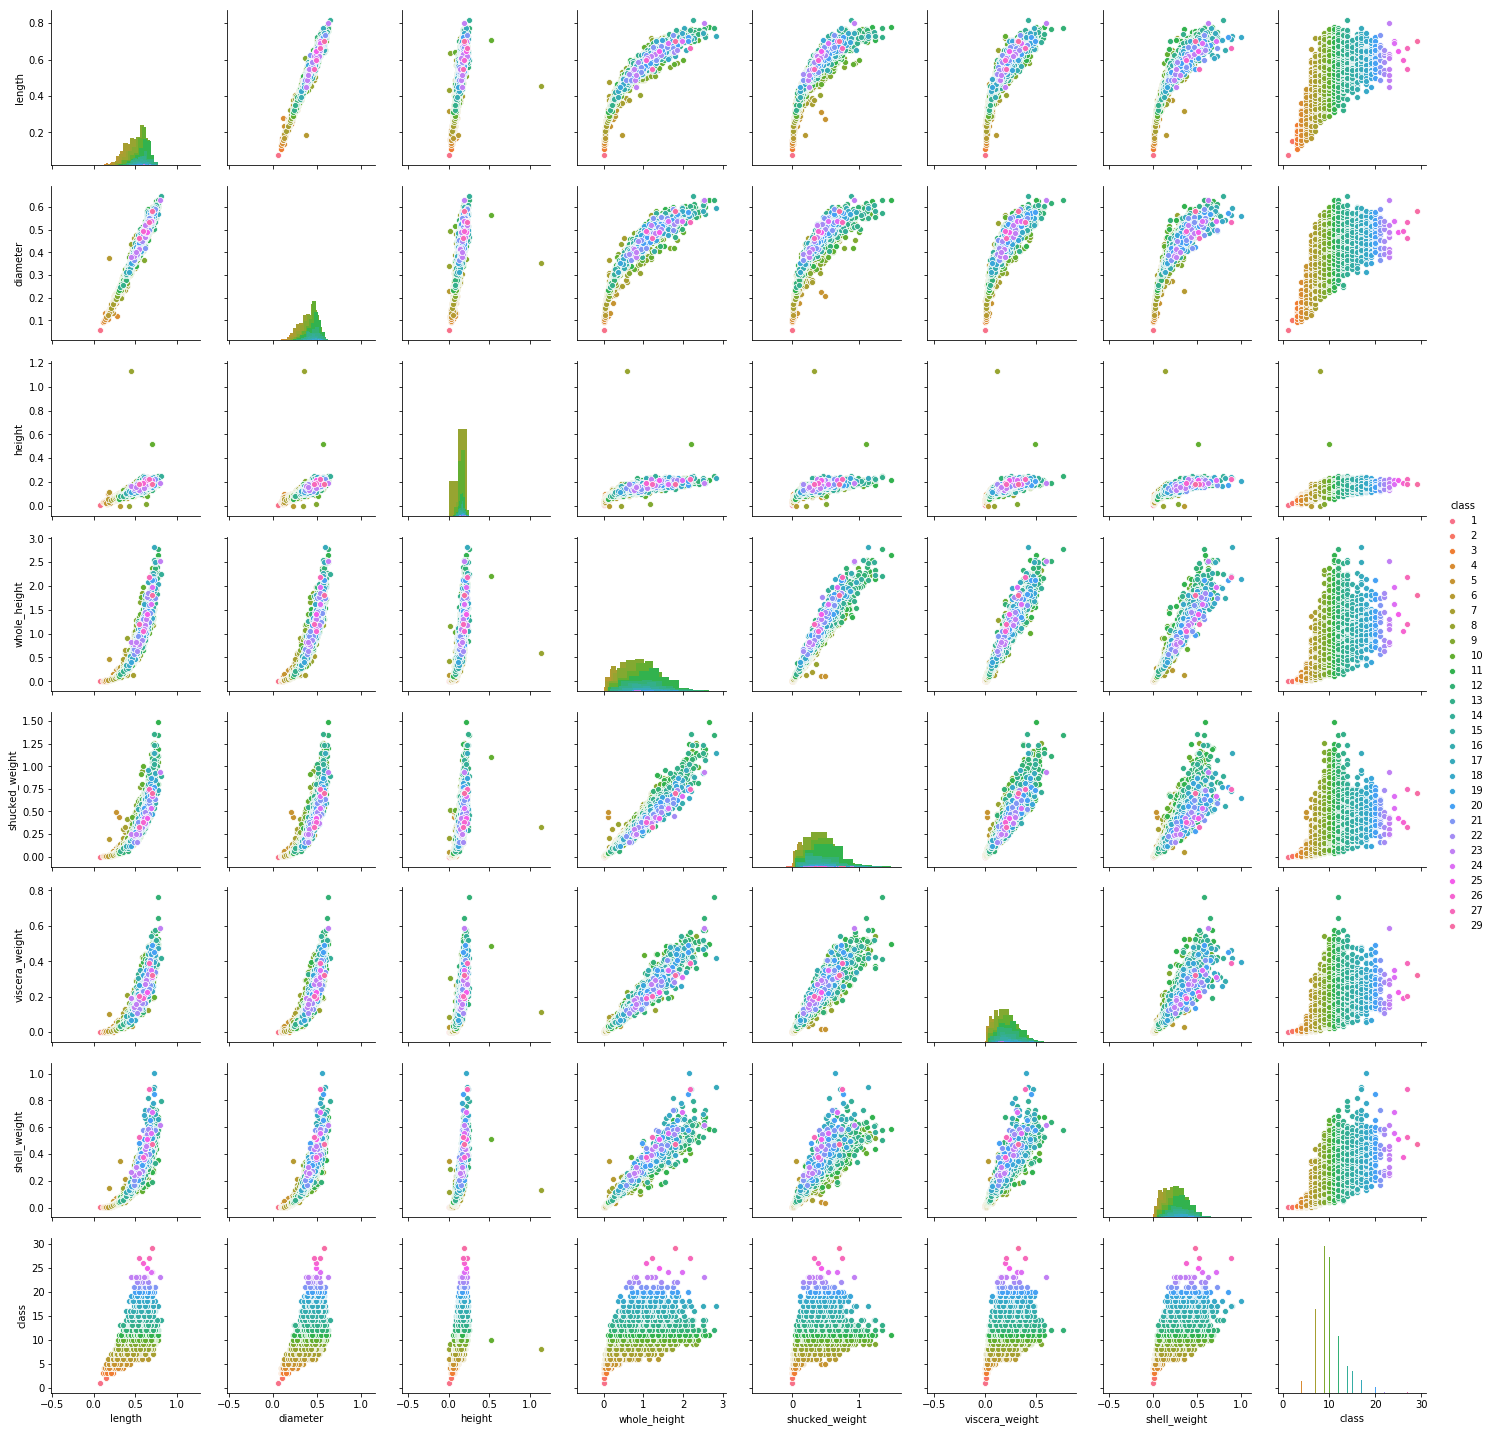

In [5]:
scatter_each_pair(abalone)

d:\programowanie\python\machine-learning-tests\venv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


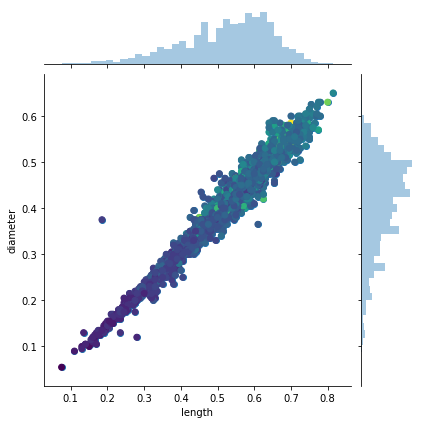

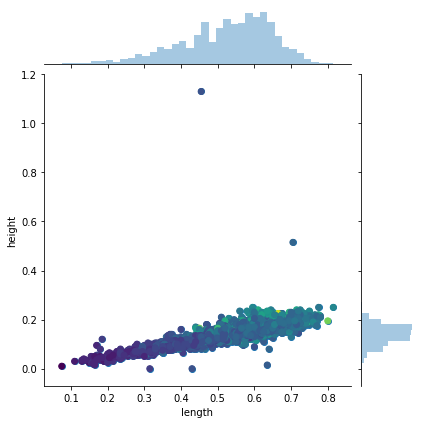

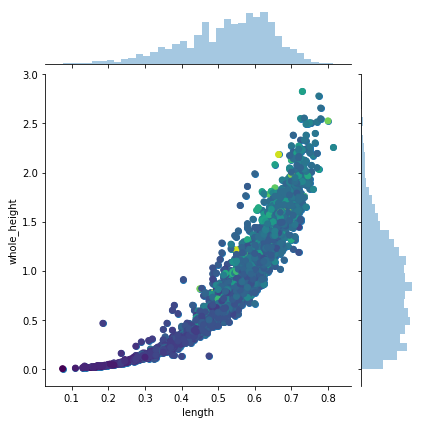

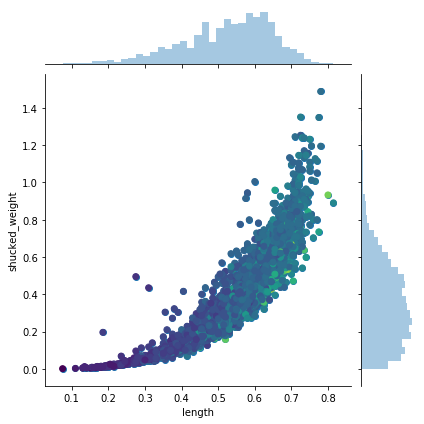

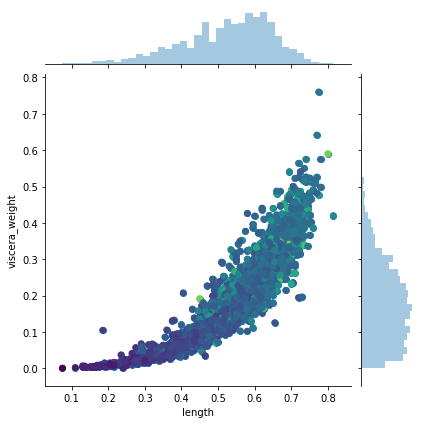

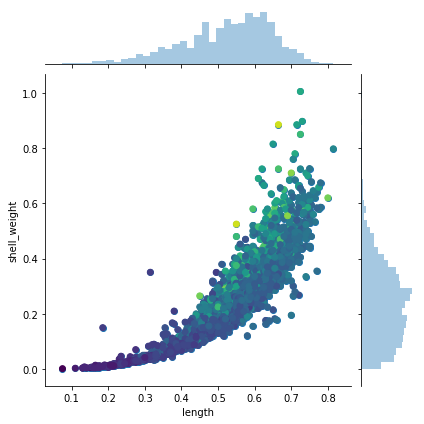

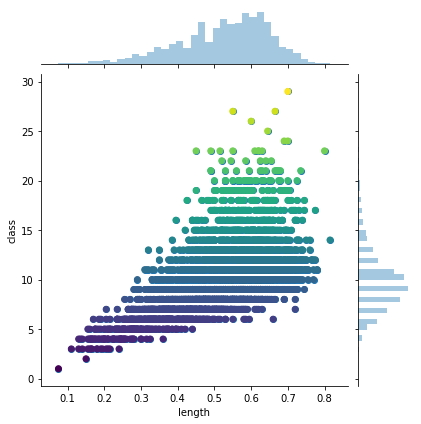

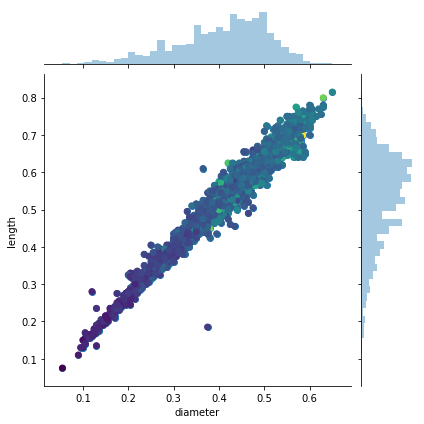

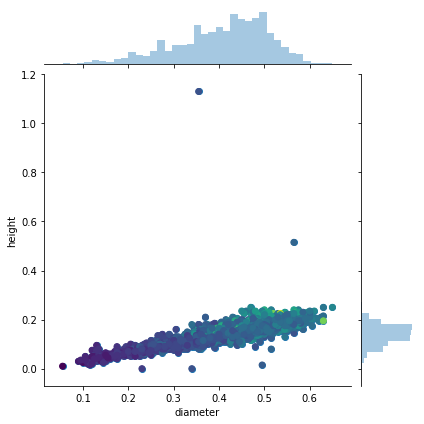

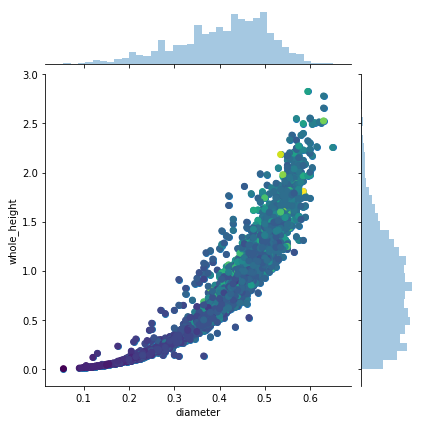

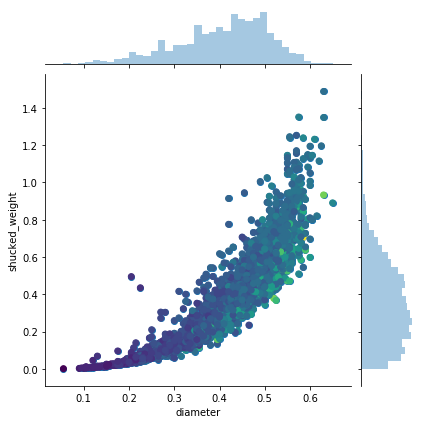

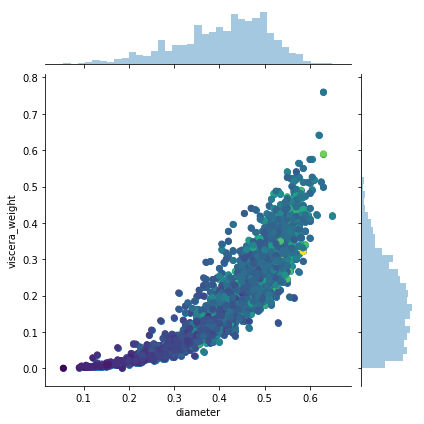

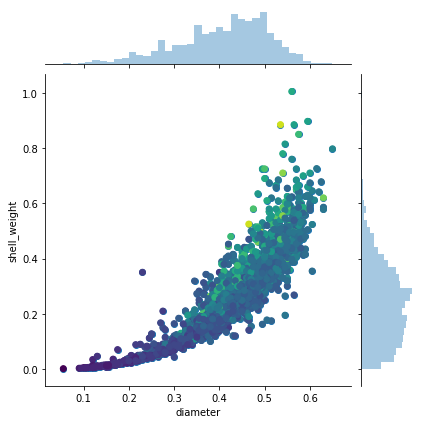

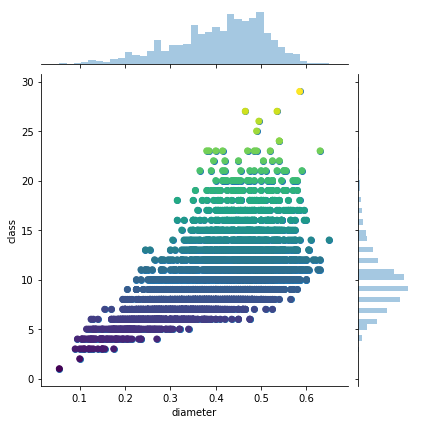

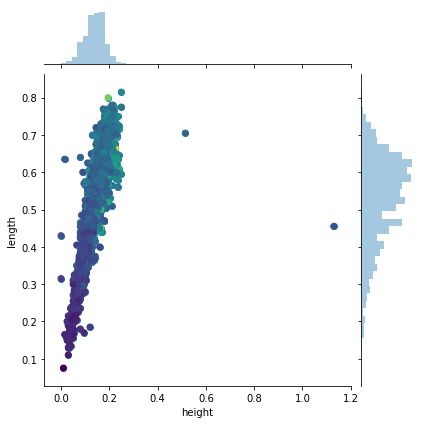

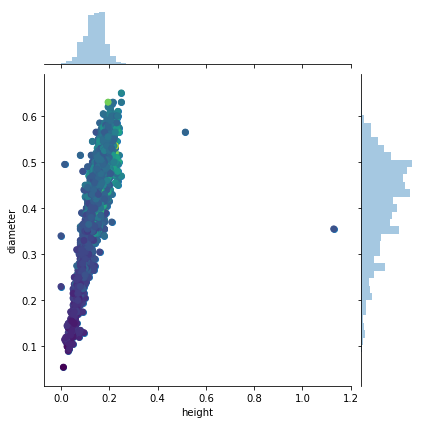

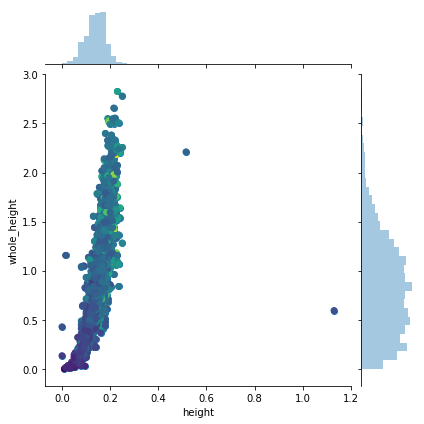

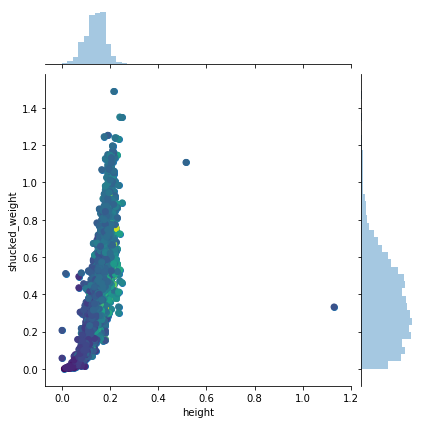

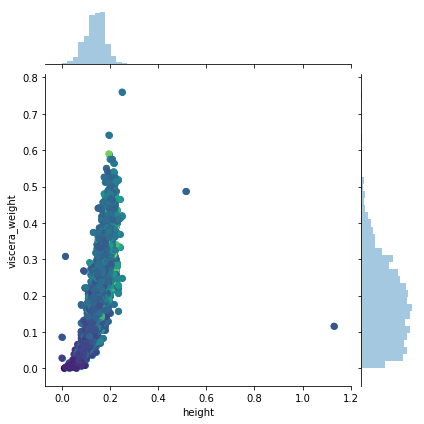

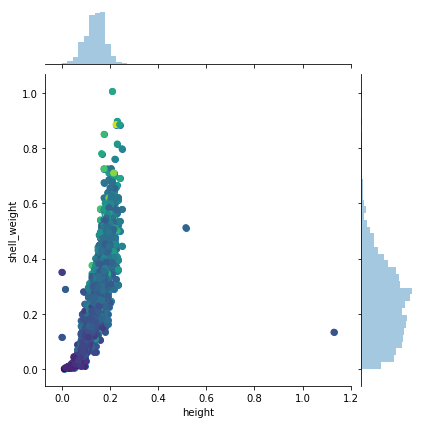

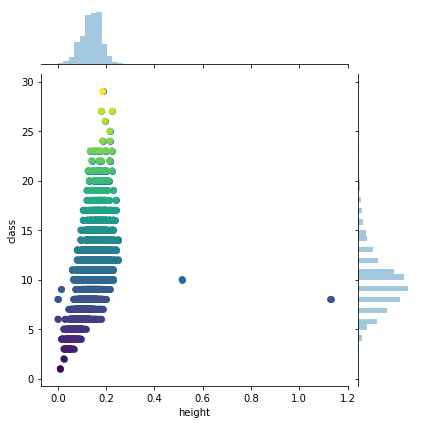

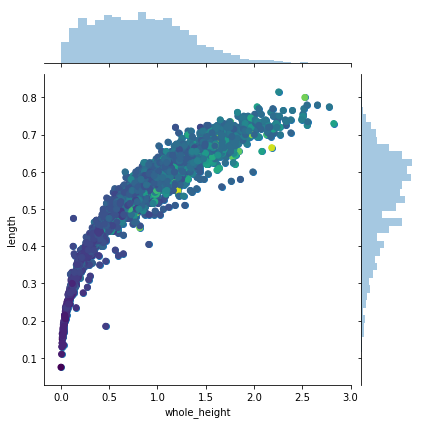

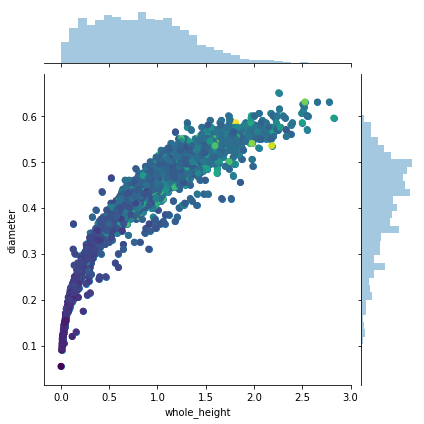

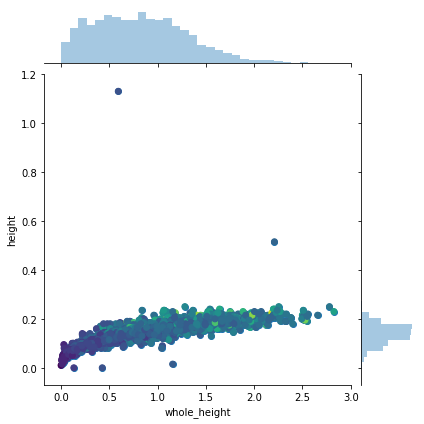

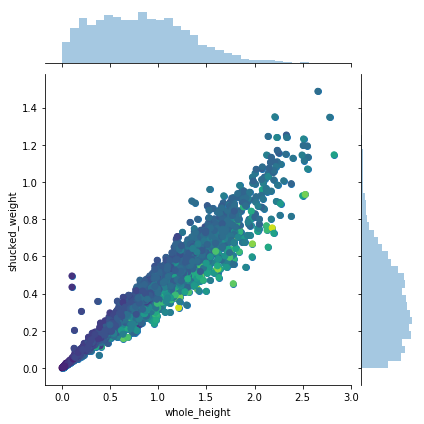

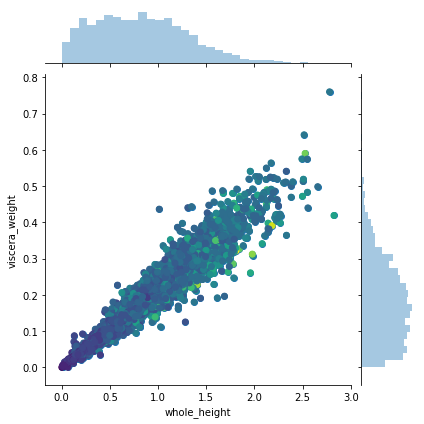

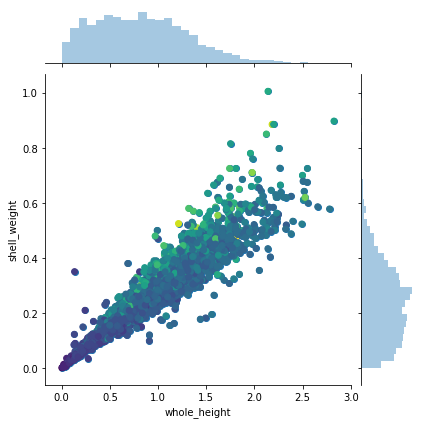

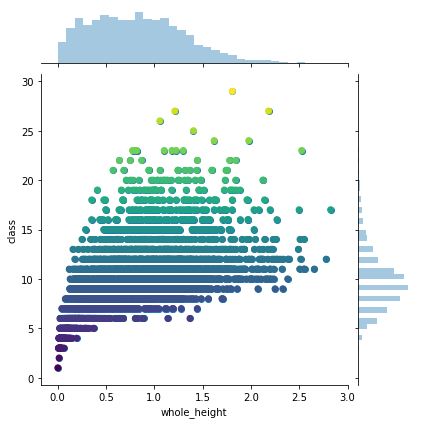

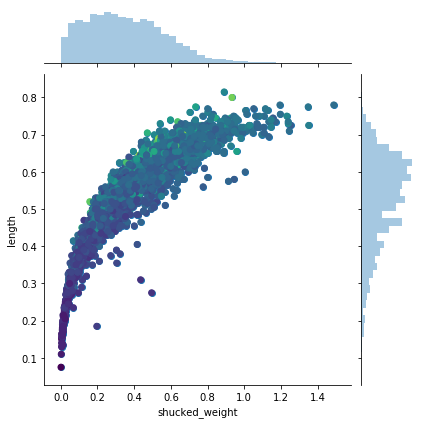

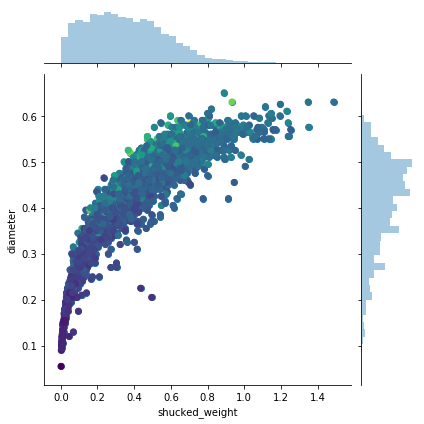

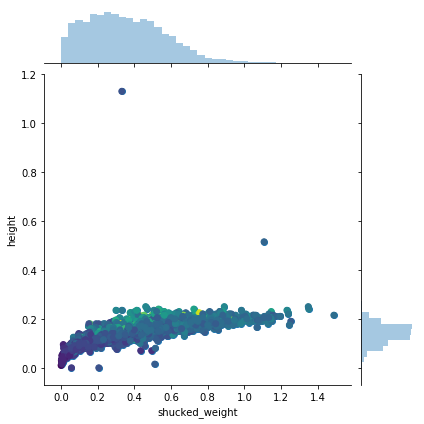

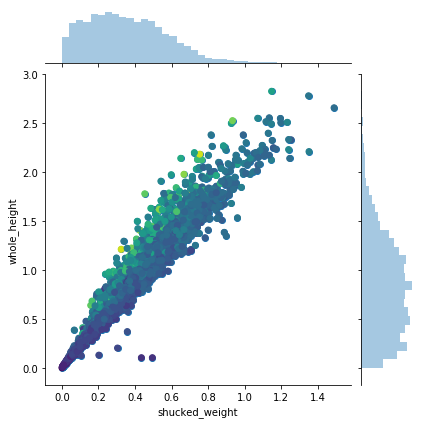

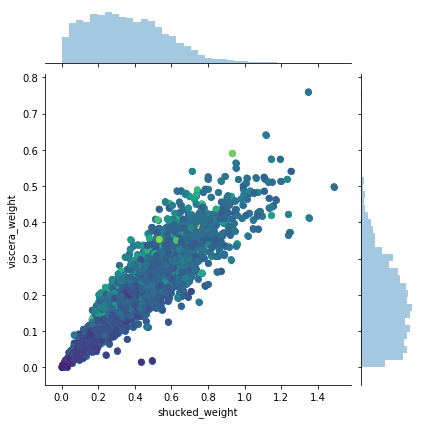

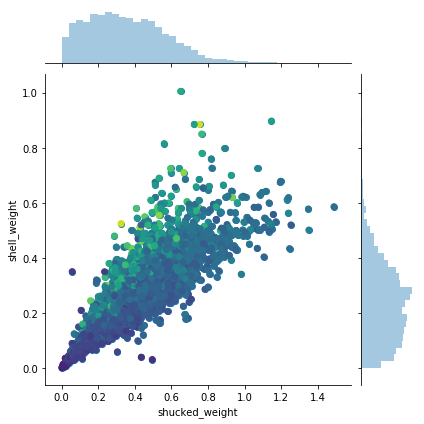

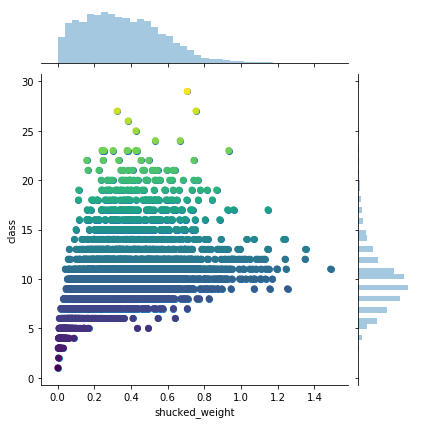

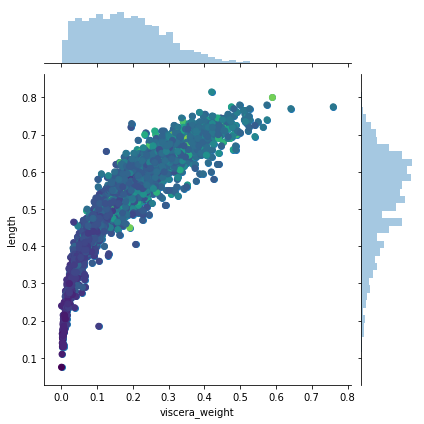

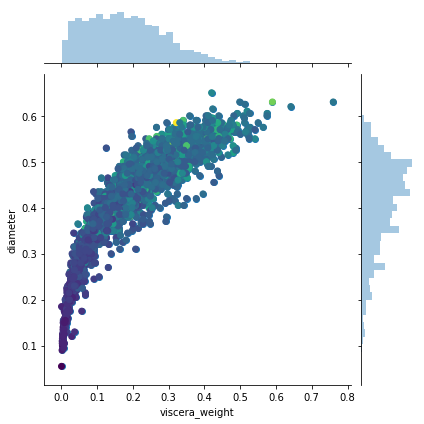

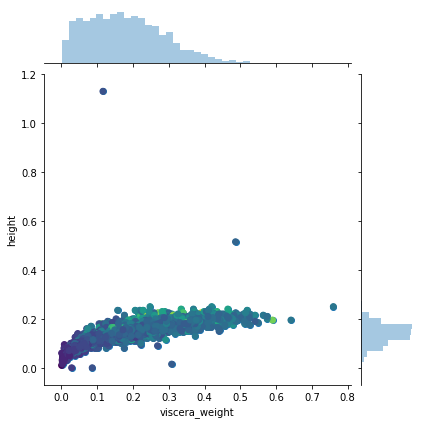

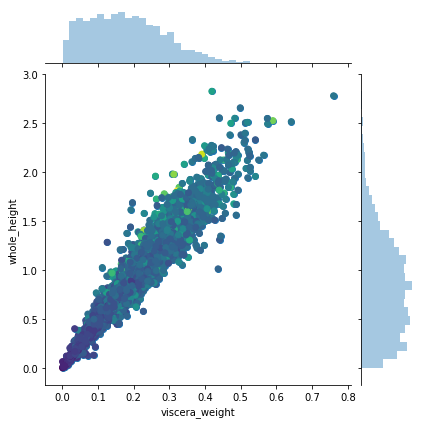

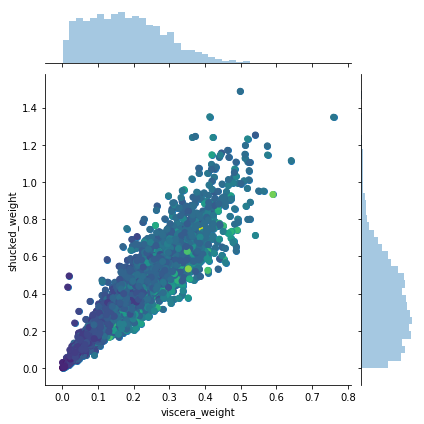

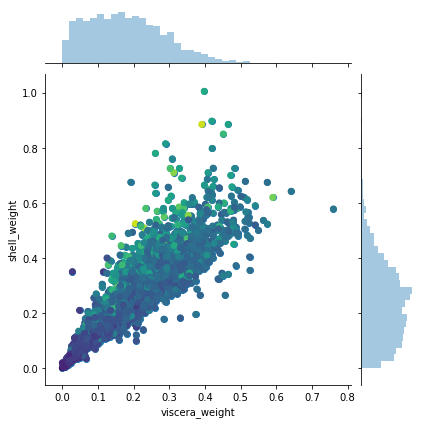

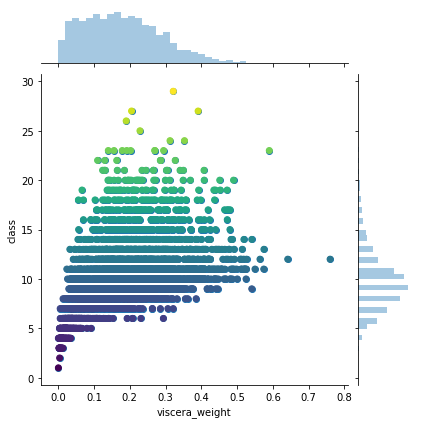

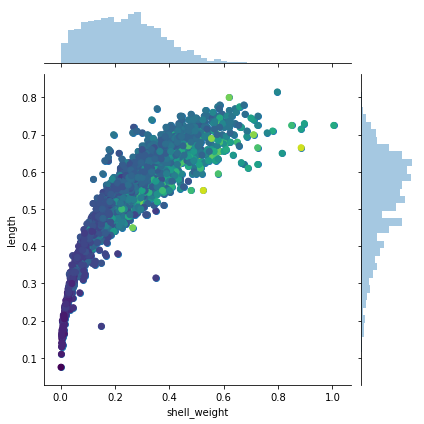

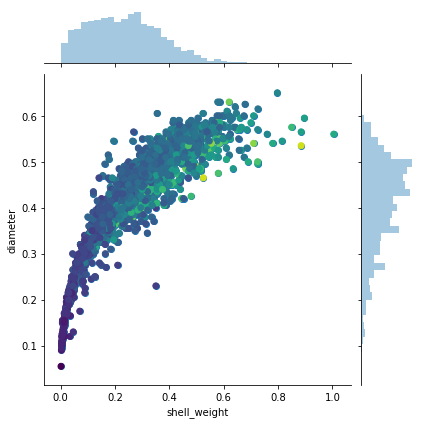

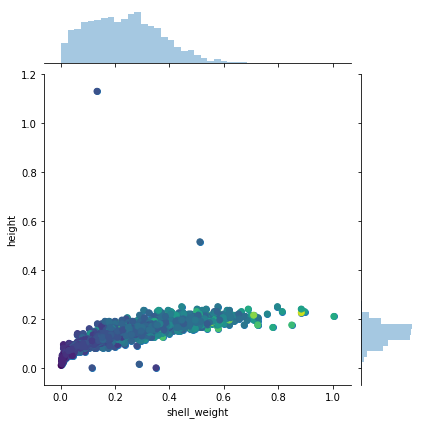

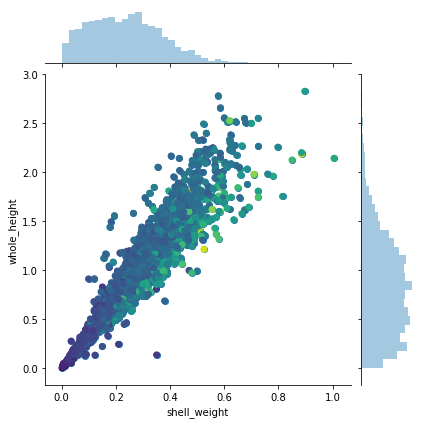

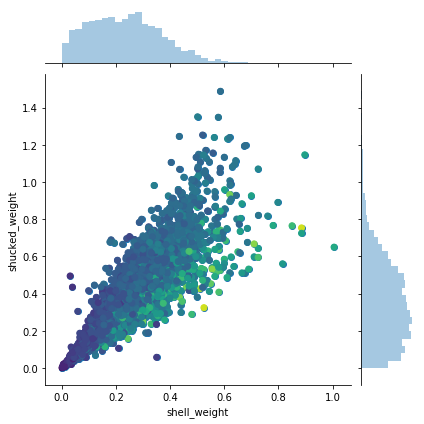

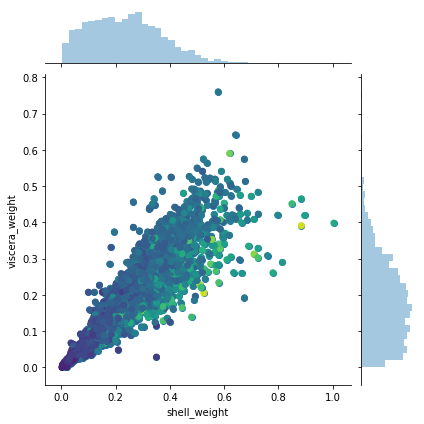

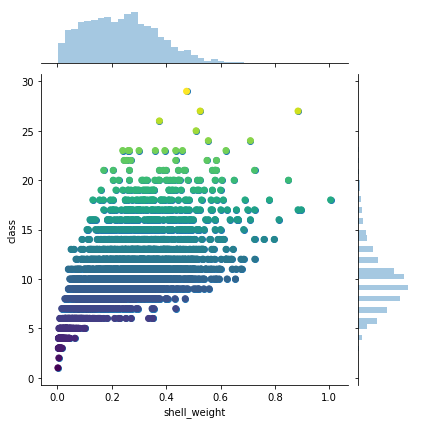

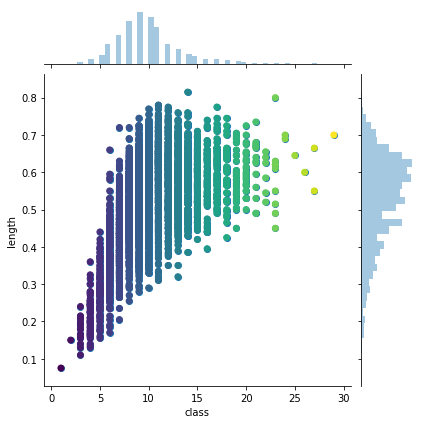

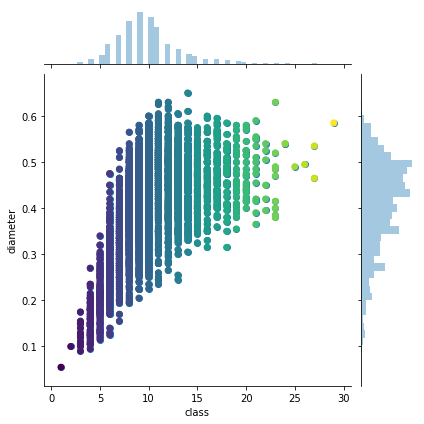

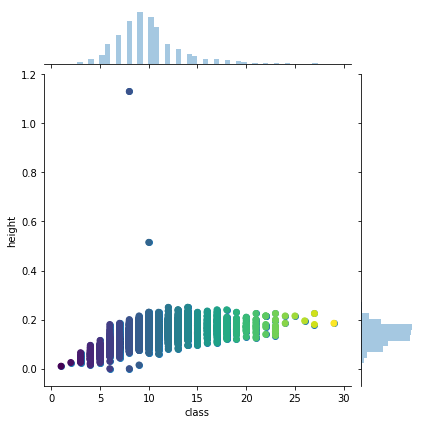

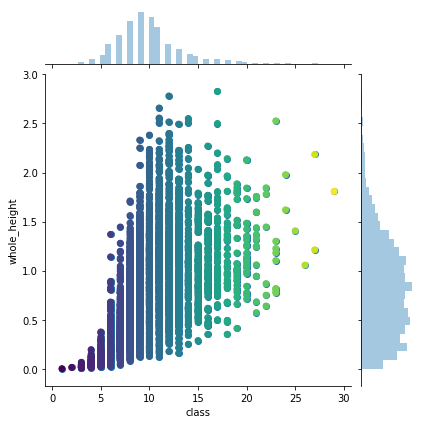

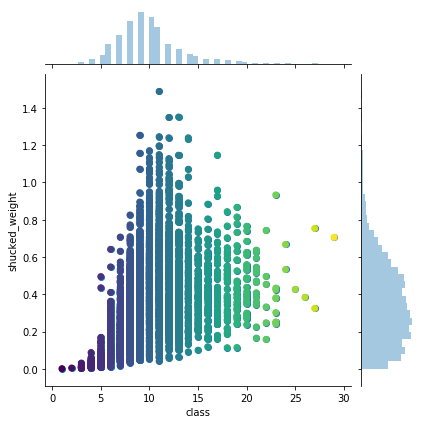

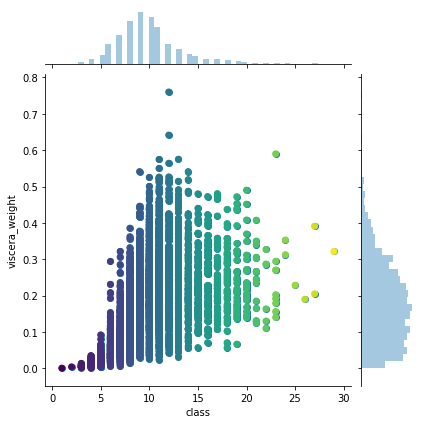

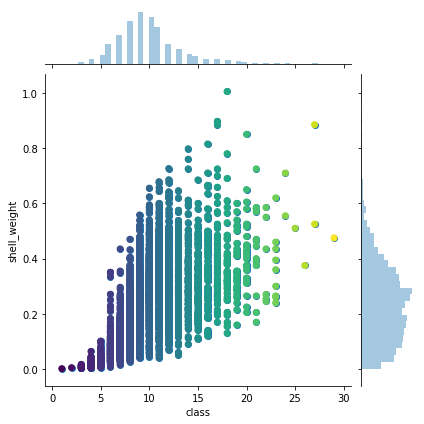

In [6]:
scatter_each_pair_separately(abalone)

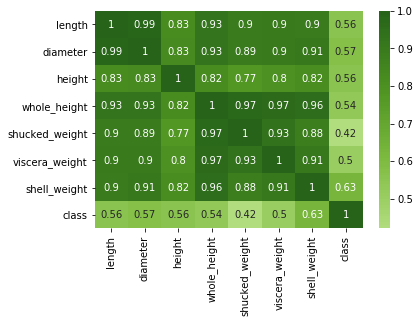

In [7]:
correlation(abalone)

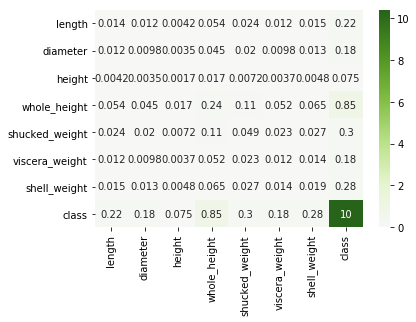

In [8]:
covariation(abalone)

In [9]:
min_max_each_attr(abalone)

sex F M
length 0.075 0.815
diameter 0.055 0.65
height 0.0 1.13
whole_height 0.002 2.8255
shucked_weight 0.001 1.4880000000000002
viscera_weight 0.0005 0.76
shell_weight 0.0015 1.005
class 1 29


#### Abalone results
When the standard deviations are small (near 0 in almost every case), the correlation is high and significant (~0.9), but the covariance can be low (~0), because correlation is normalized and the covariance is not.

Most attributes have big correlation with each other (~0.9), but medium correlation with class ('rings') - from about 0.4 to 0.6. The highest correlation with class has the 'shell_weight' (0.63) attribute and the smallest - 'shucked_weight' (0.42). 'Height' has the lowest correlation with other attributes.

### Banknote dataset

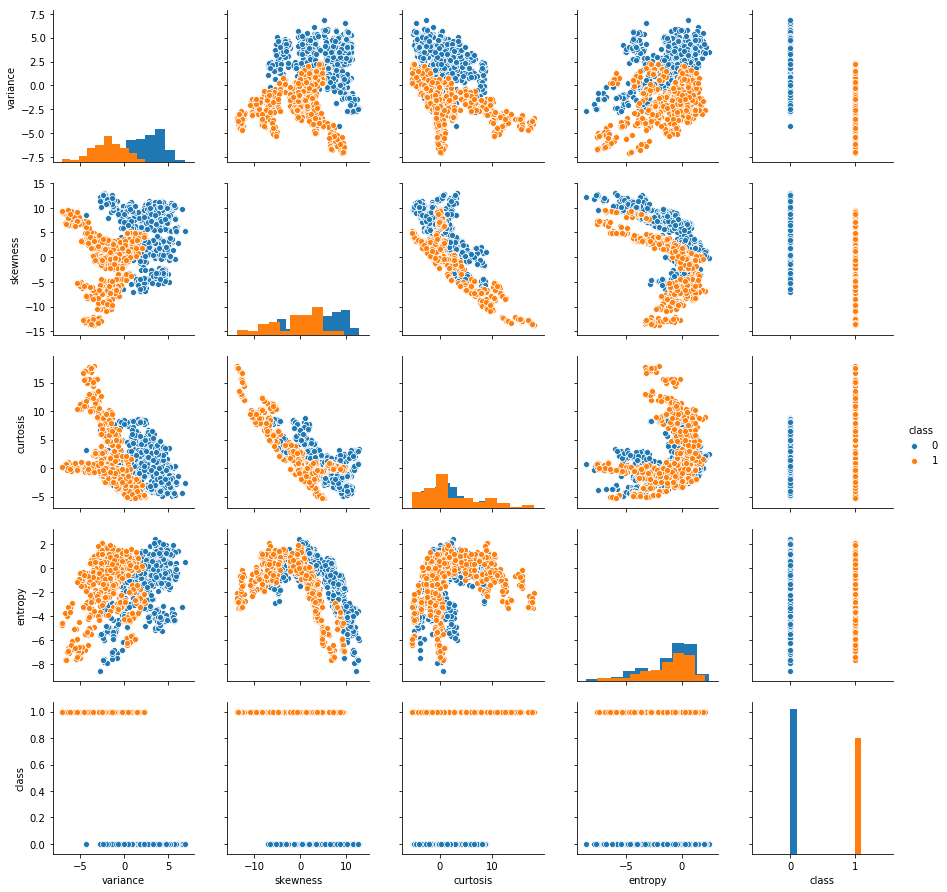

In [10]:
scatter_each_pair(banknote)

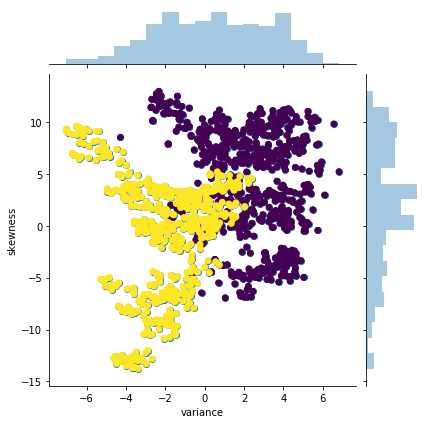

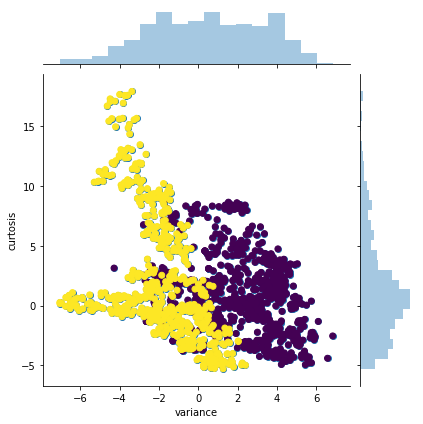

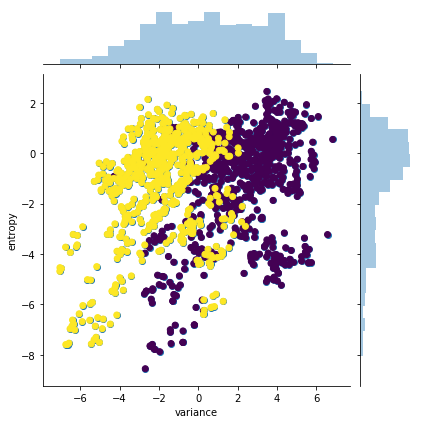

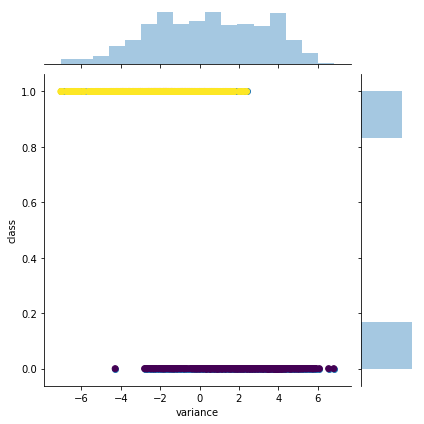

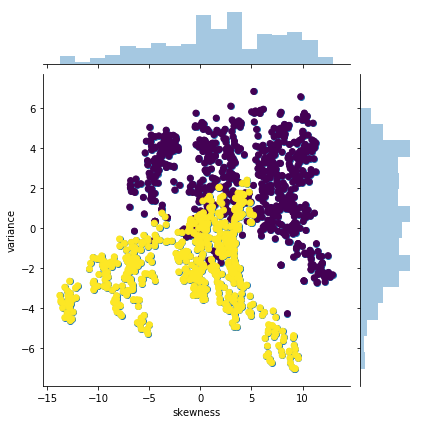

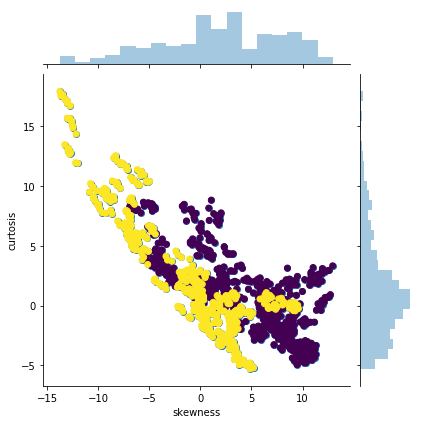

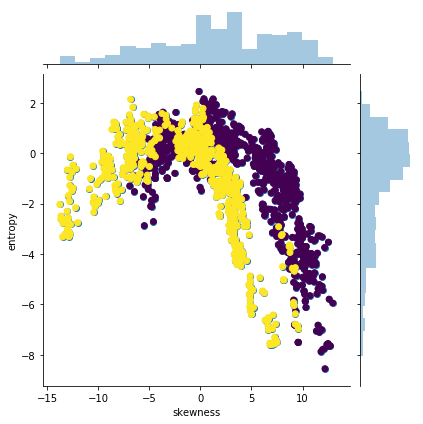

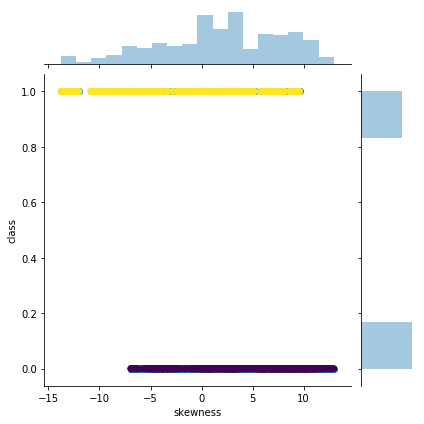

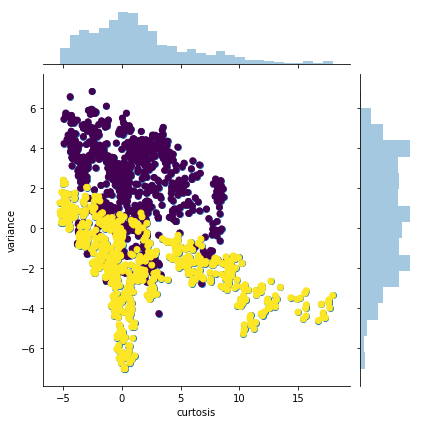

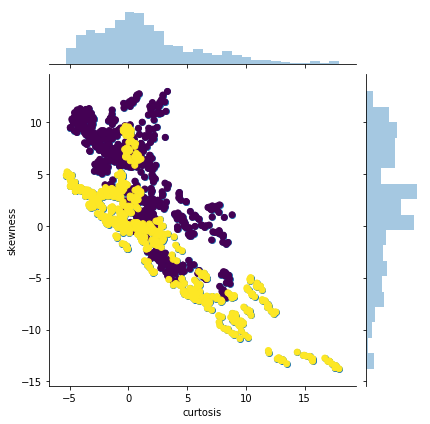

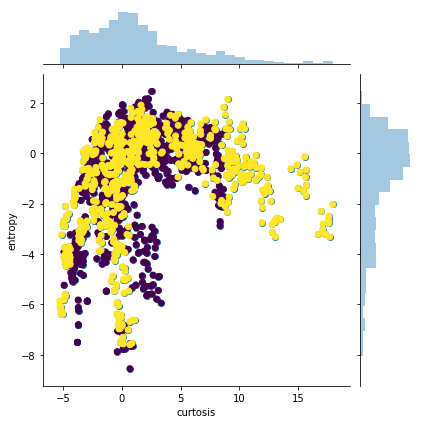

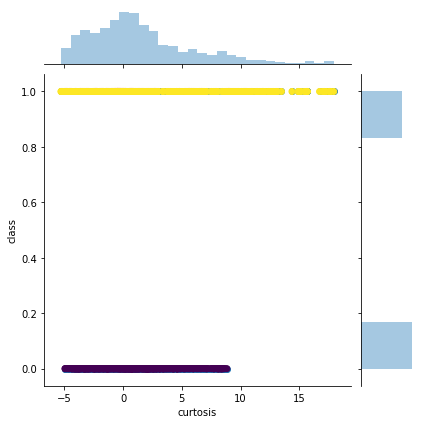

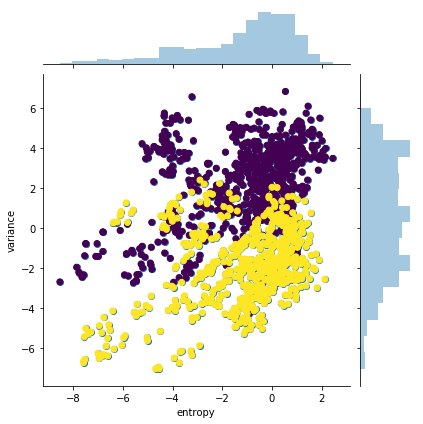

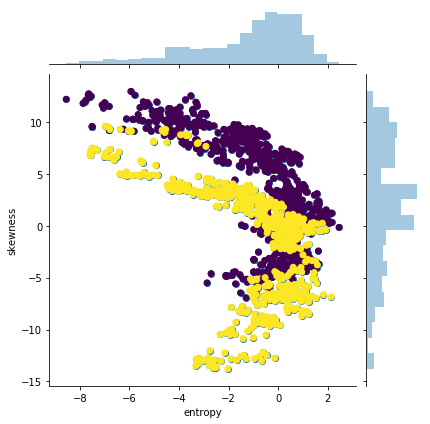

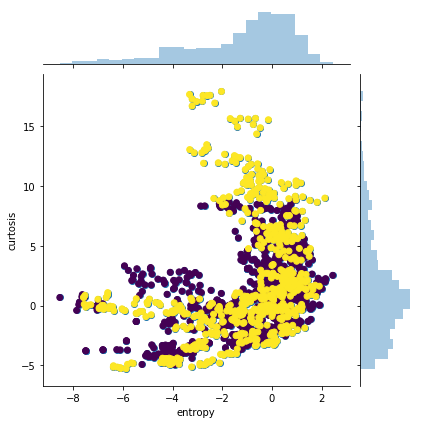

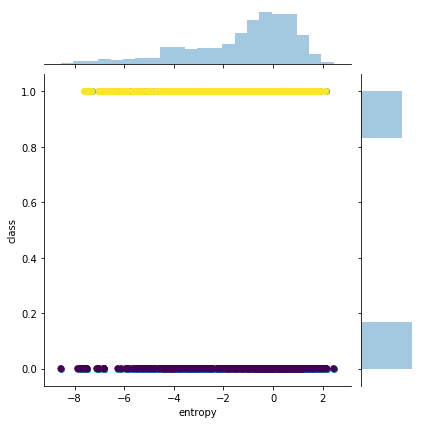

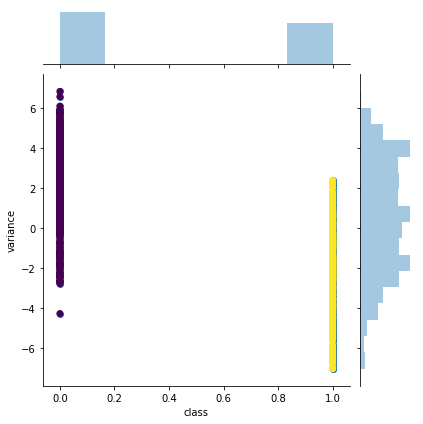

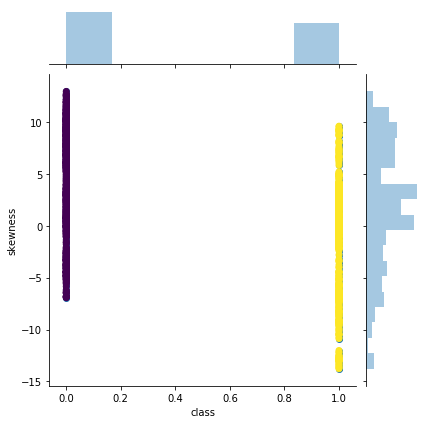

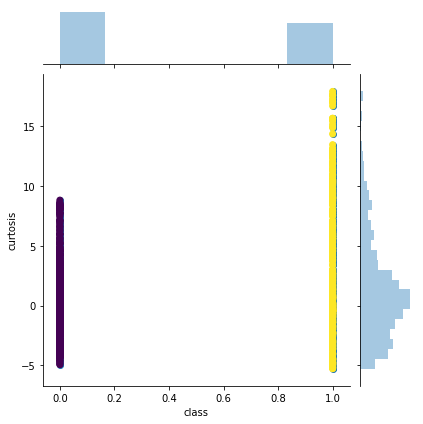

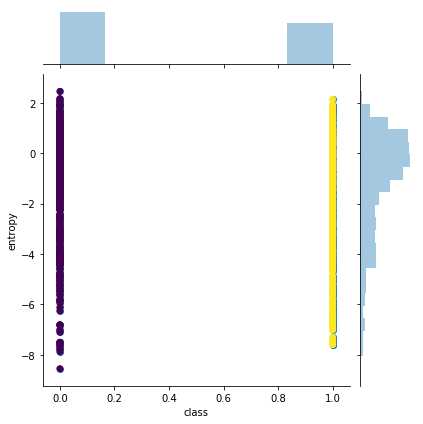

In [11]:
scatter_each_pair_separately(banknote)

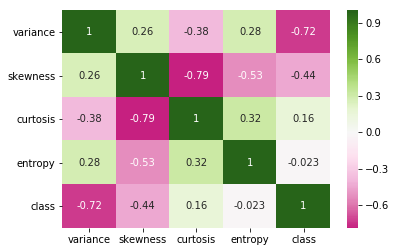

In [12]:
correlation(banknote)

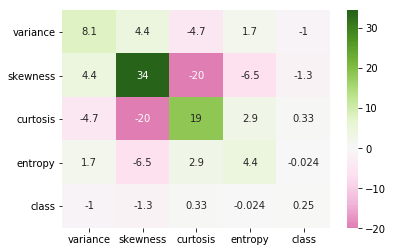

In [13]:
covariation(banknote)

In [14]:
min_max_each_attr(banknote)

variance -7.0421 6.8248
skewness -13.7731 12.9516
curtosis -5.2861 17.9274
entropy -8.5482 2.4495
class 0 1


#### Banknote results

The highest correlation with the class attribute has the 'variance' attribute (-0.72). 'Skewness' is mildly important with correlation -0.44 and the rest of the attributes are close to 0.

In this dataset variances of attributes are rather high, so the covariance is also sometimes high - curtosis has high covariance with skewness (-20).

### Yeast dataset
(this dataset was added, because the banknote dataset doesn't have 5 attributes)

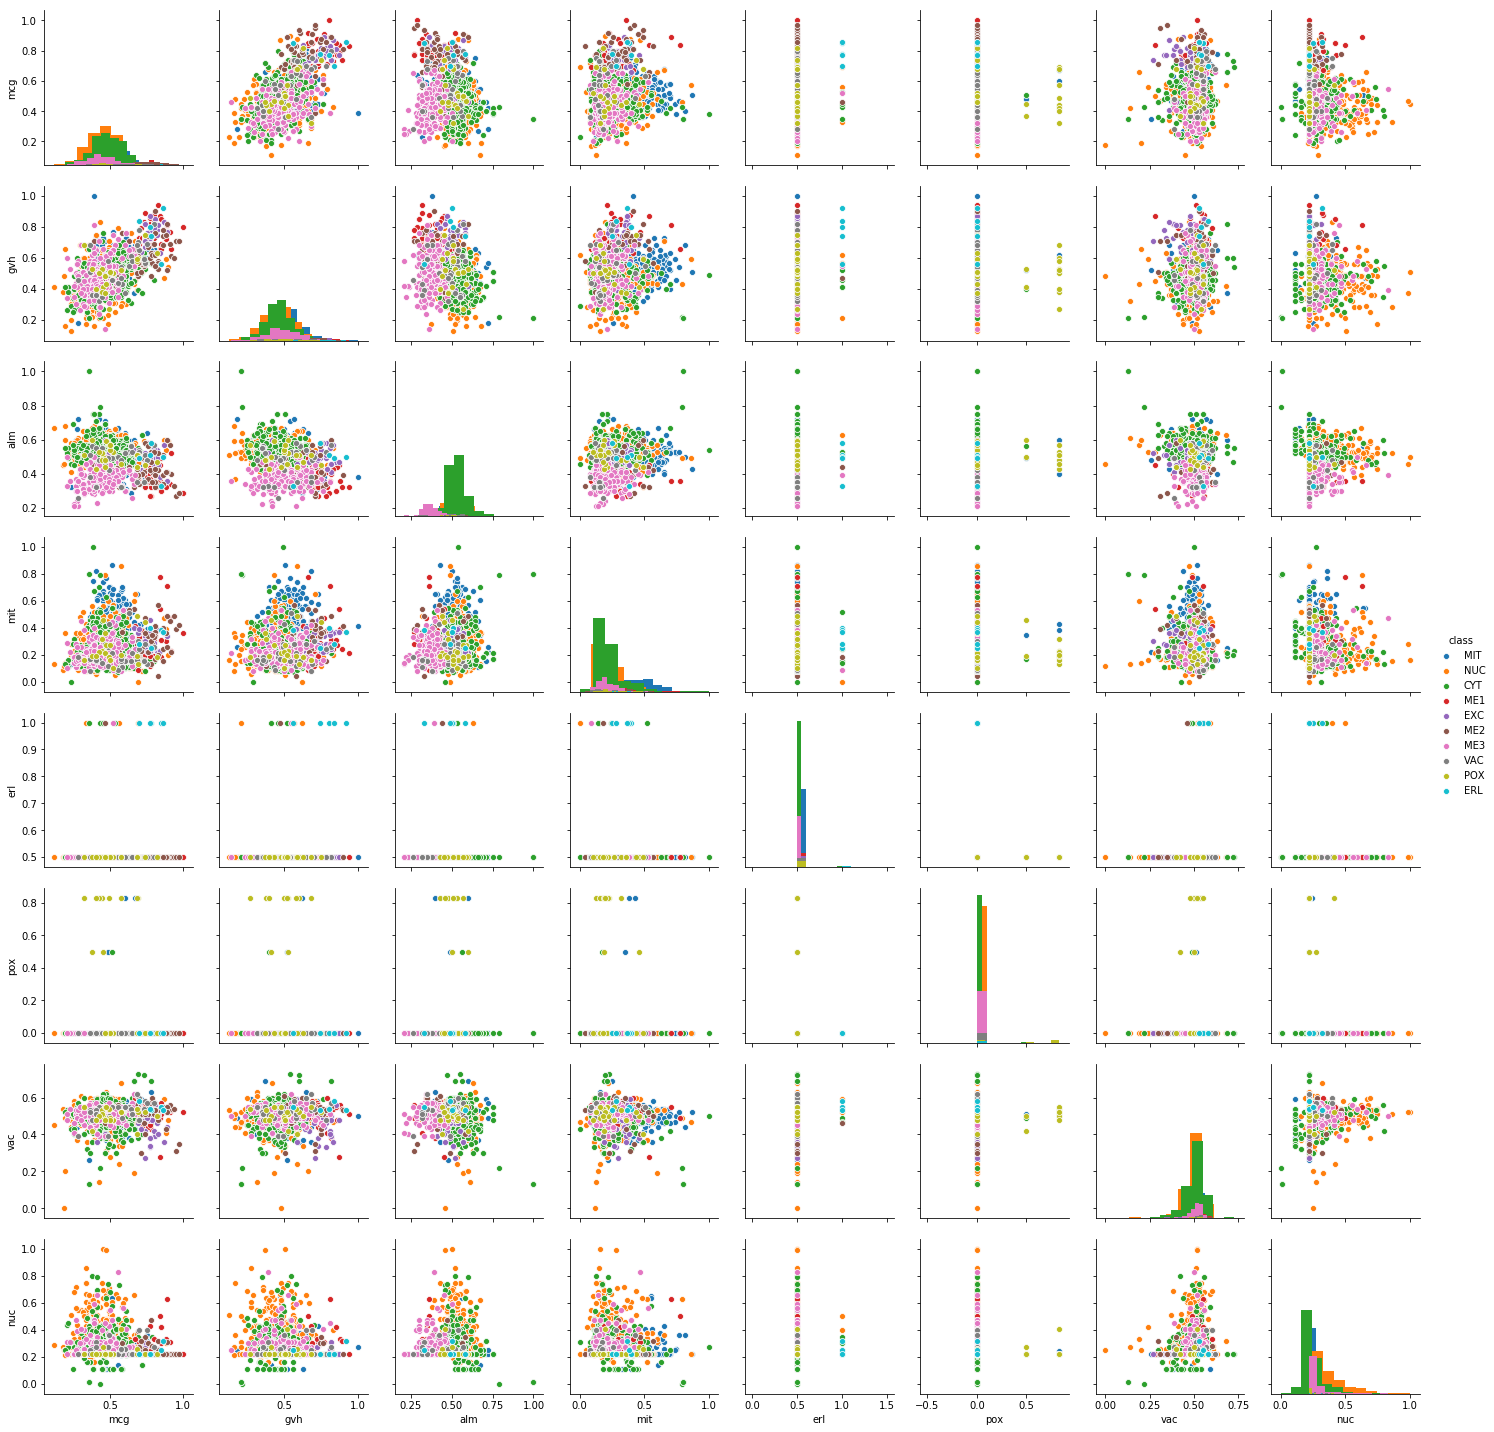

In [15]:
scatter_each_pair(yeast)

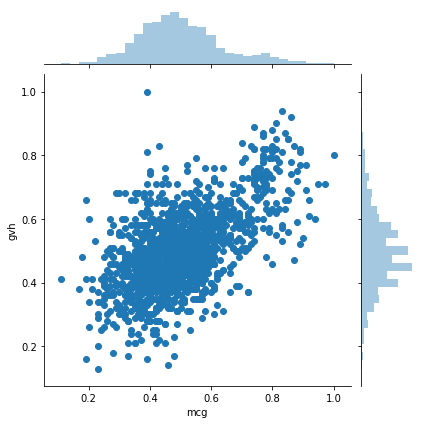

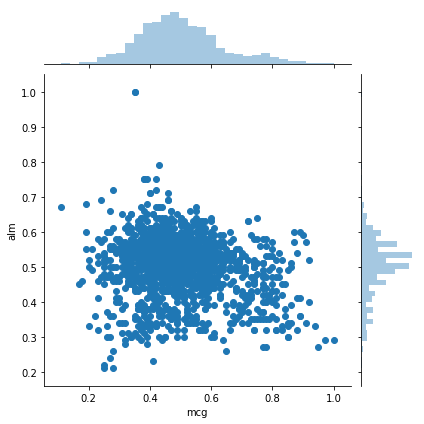

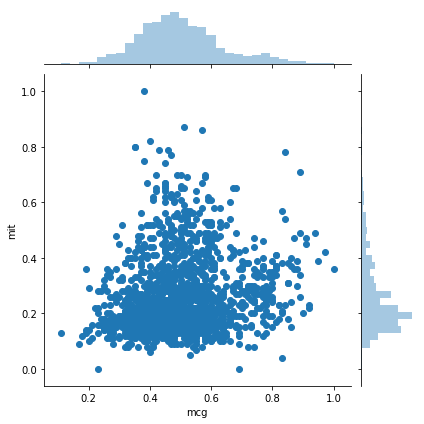

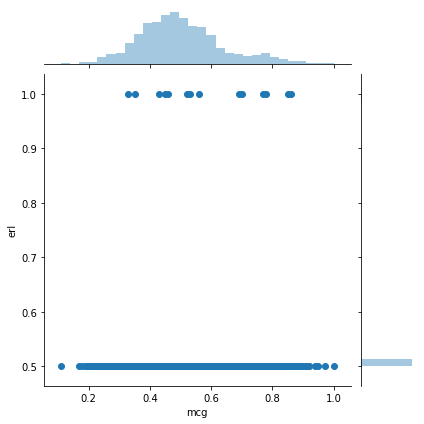

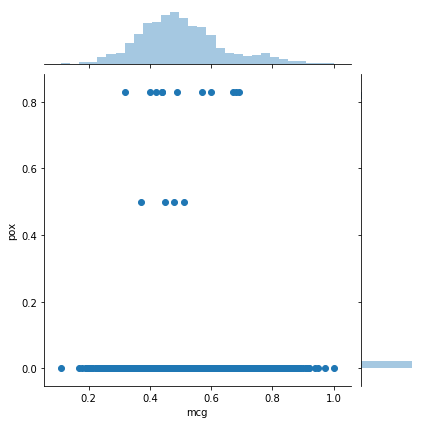

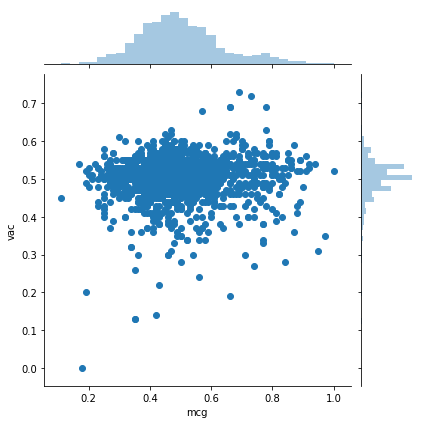

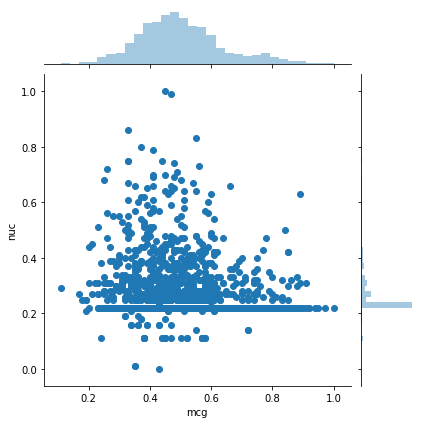

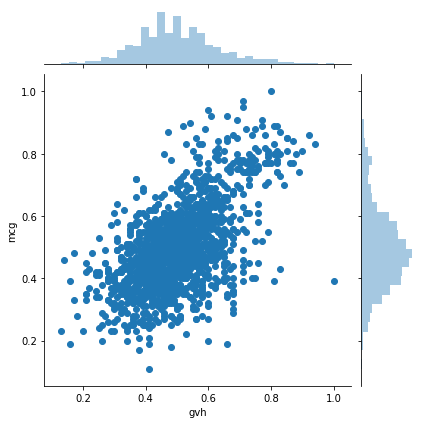

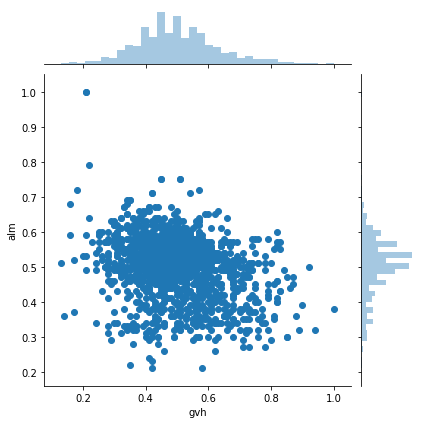

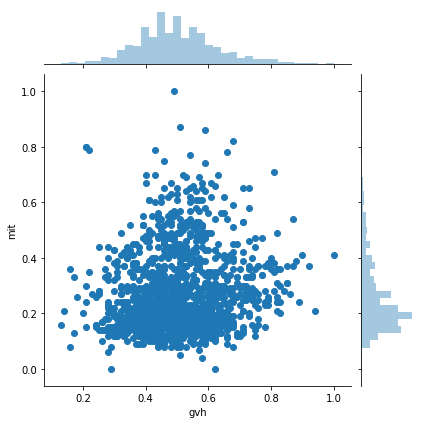

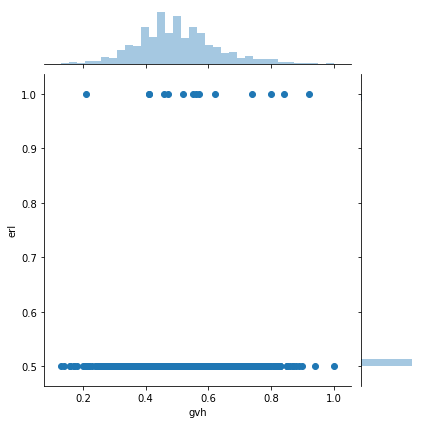

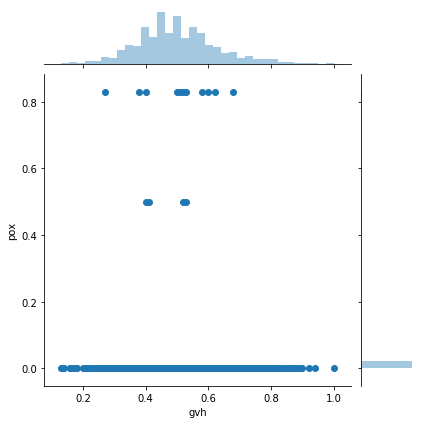

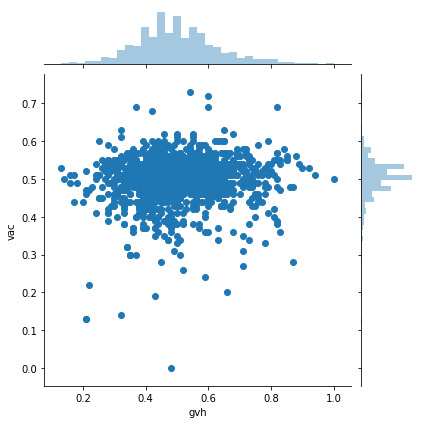

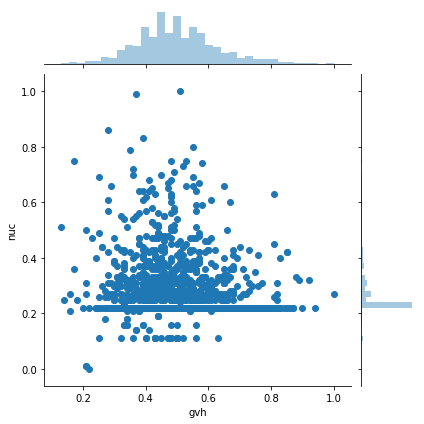

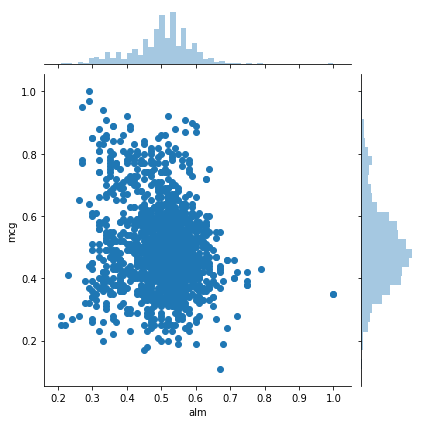

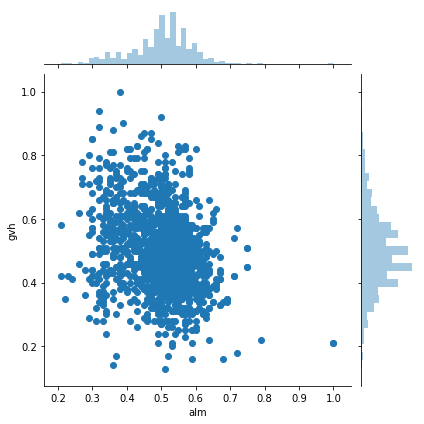

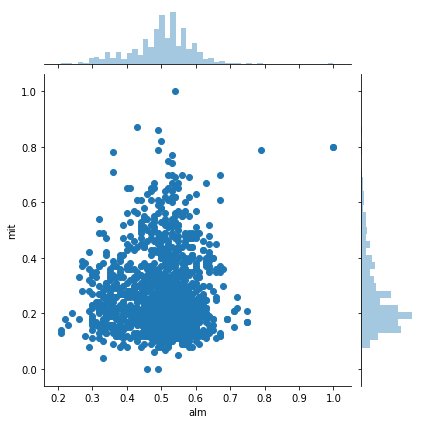

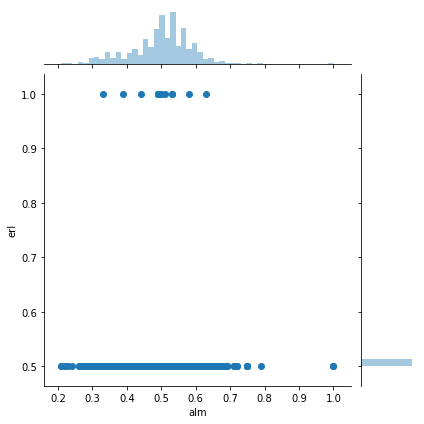

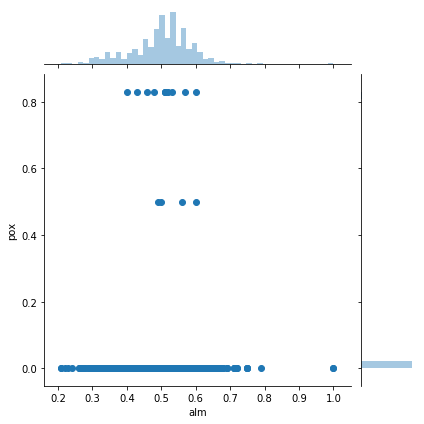

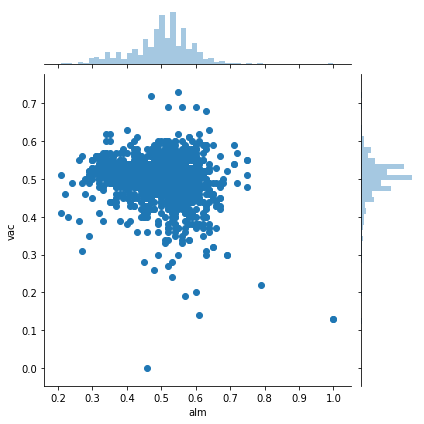

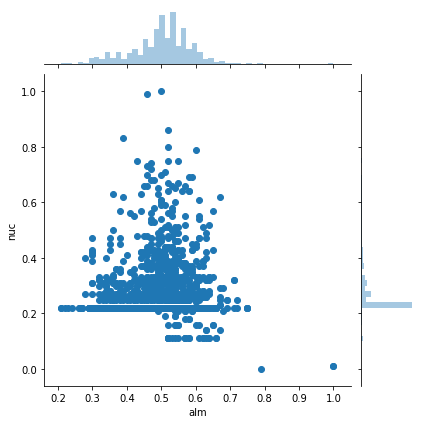

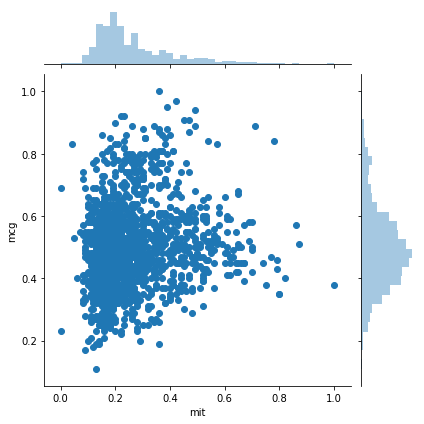

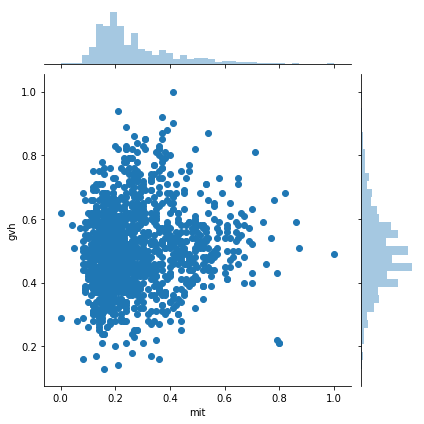

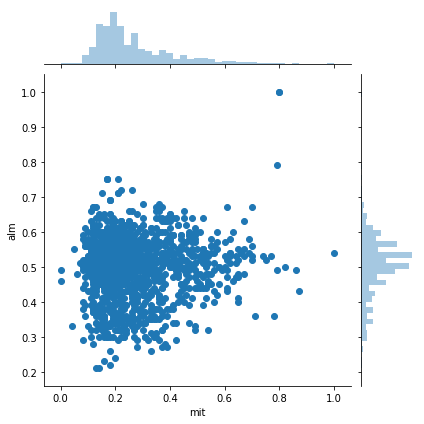

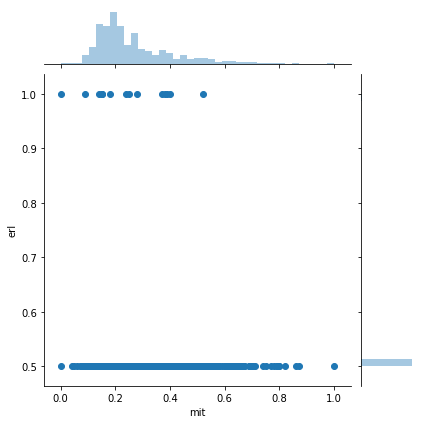

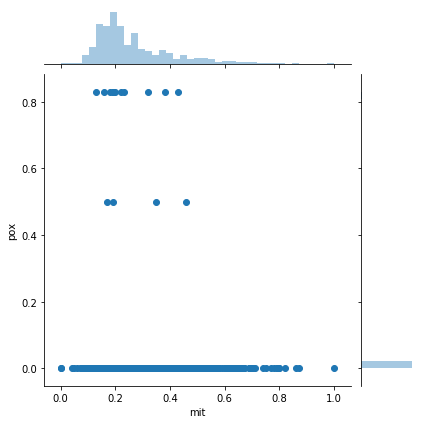

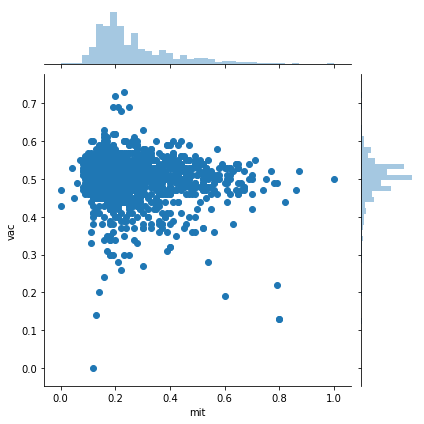

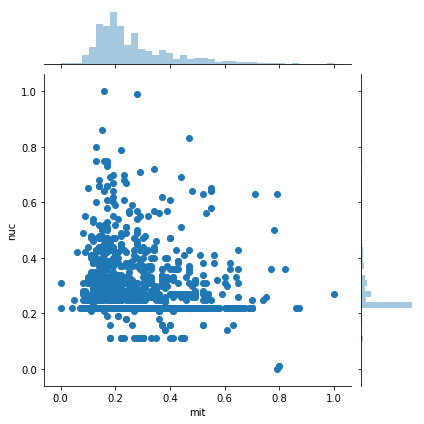

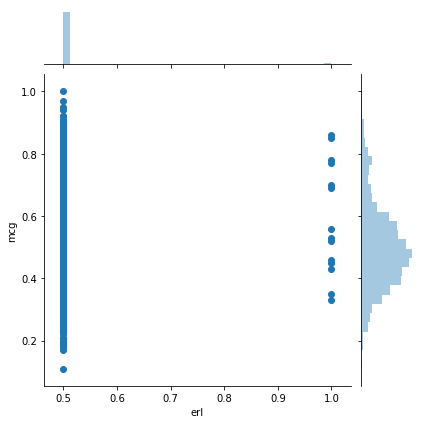

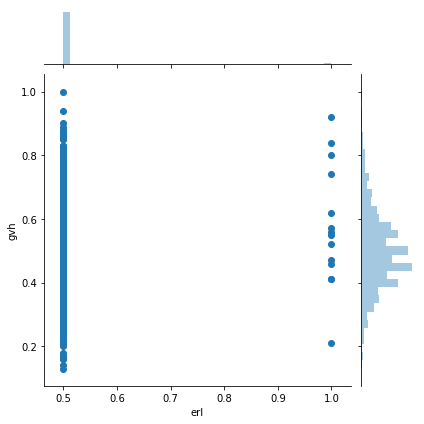

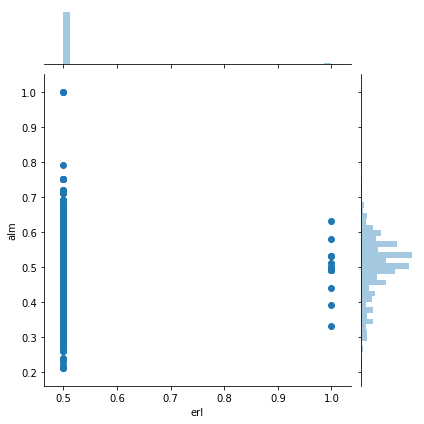

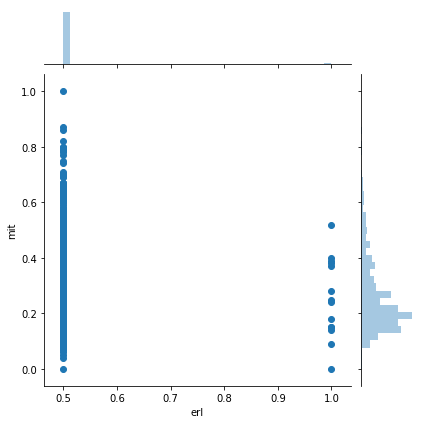

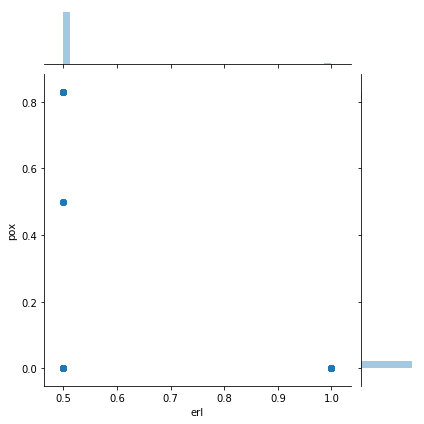

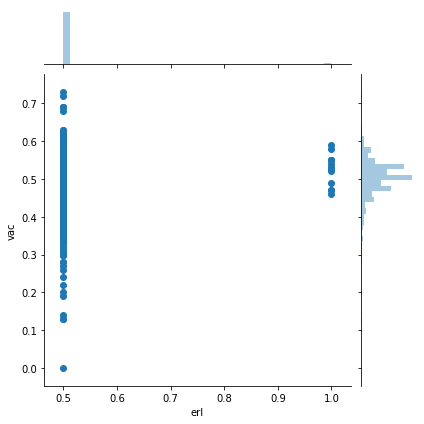

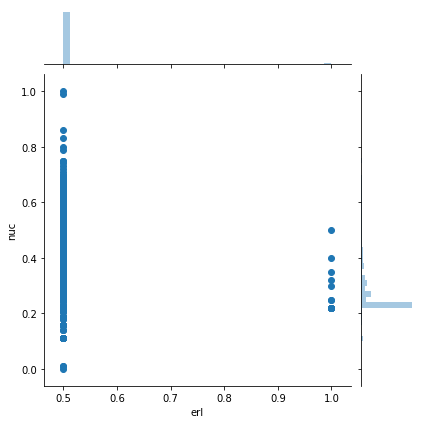

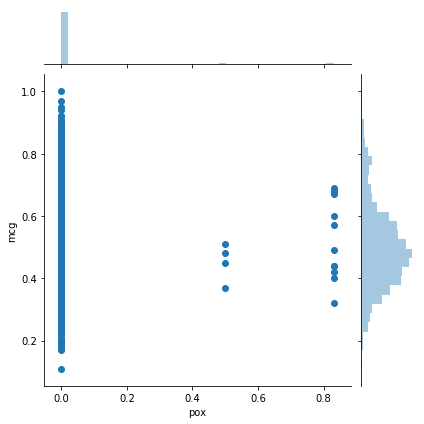

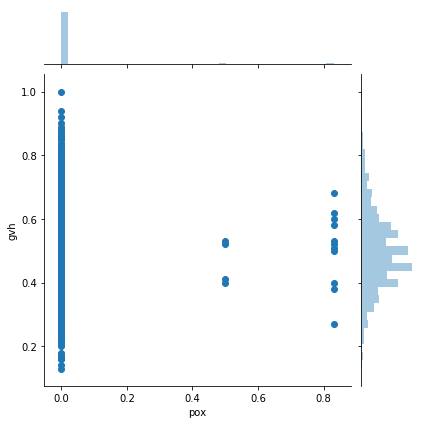

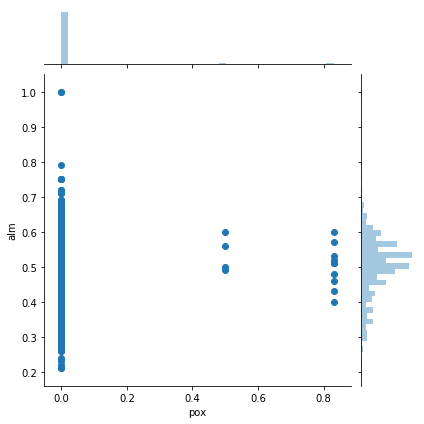

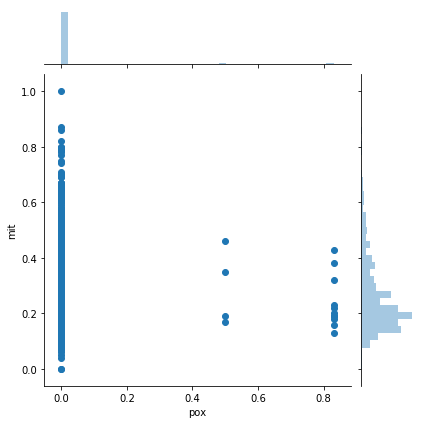

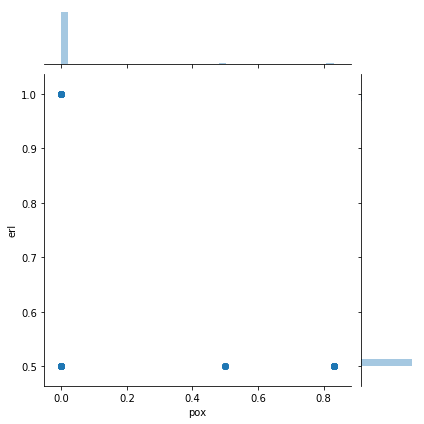

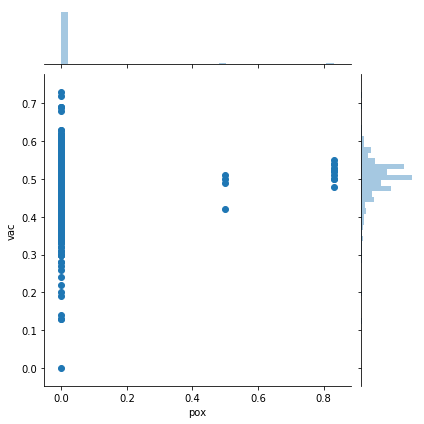

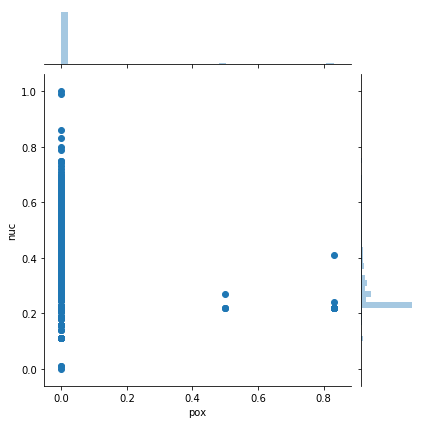

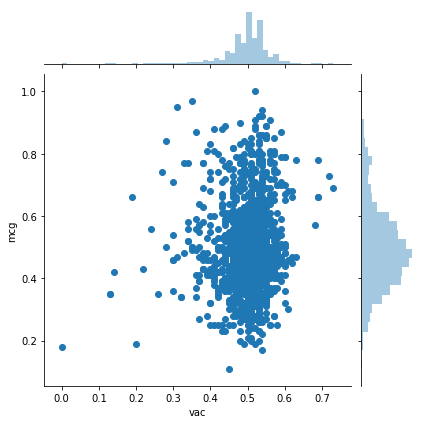

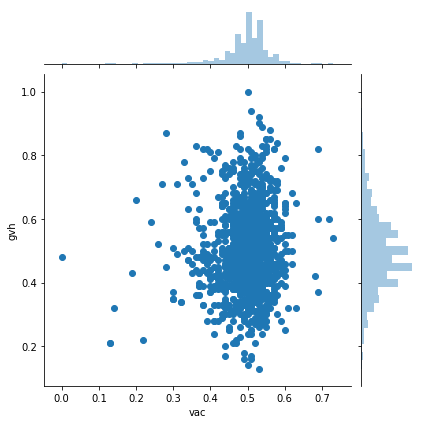

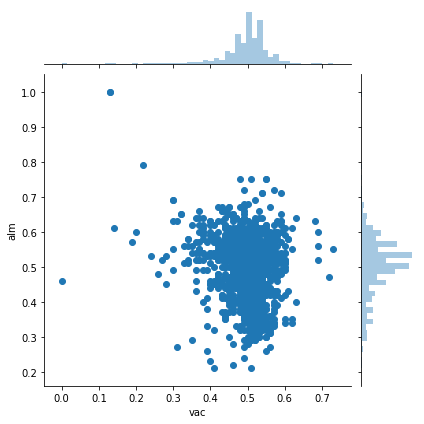

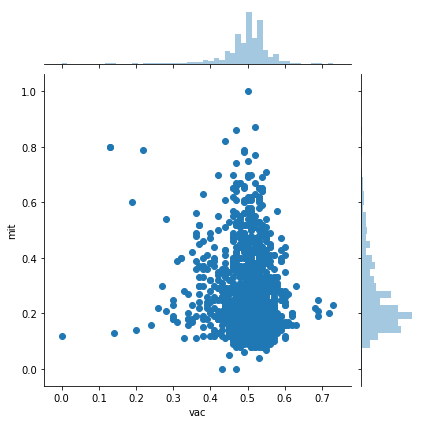

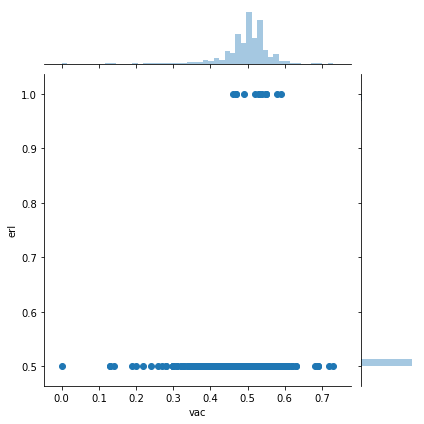

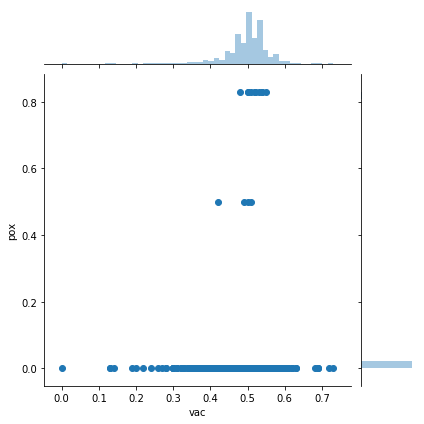

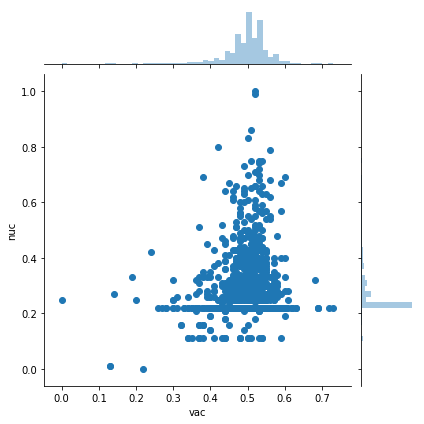

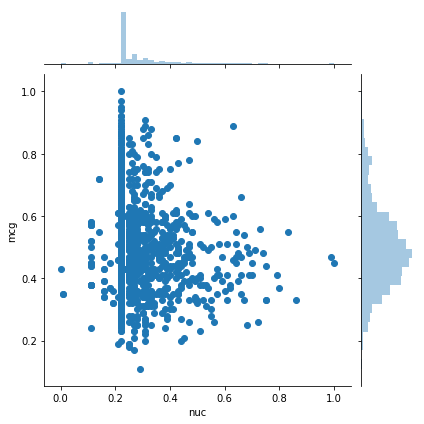

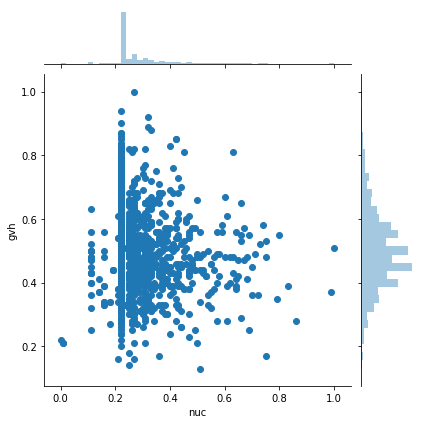

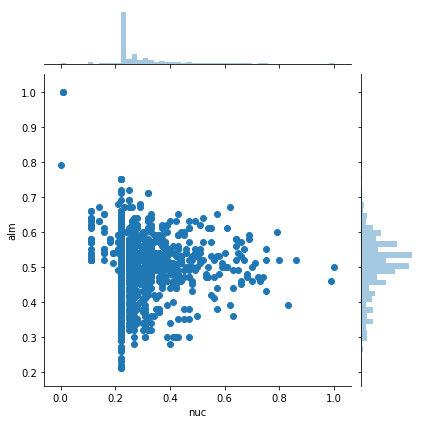

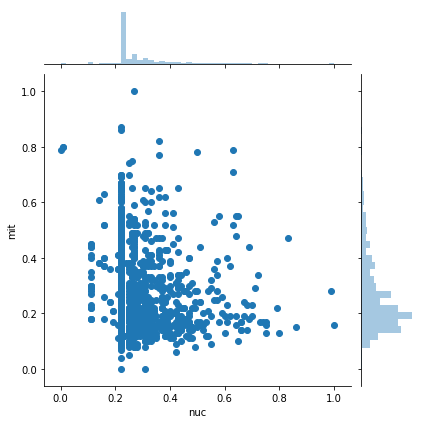

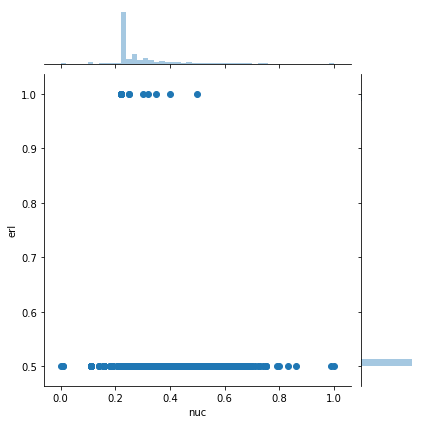

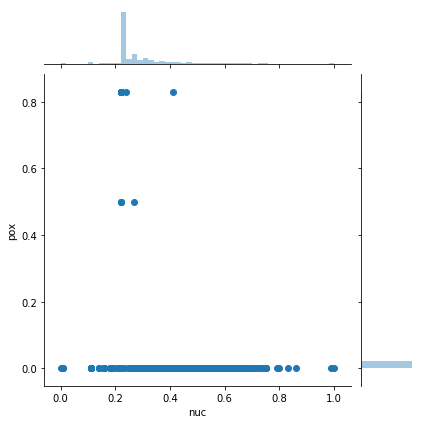

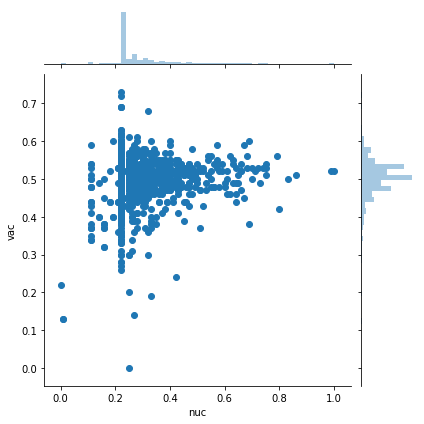

In [18]:
scatter_each_pair_separately(yeast)

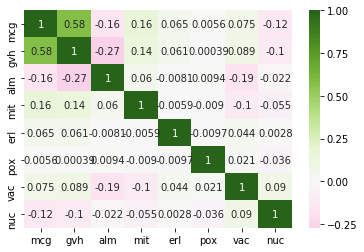

In [19]:
correlation(yeast)

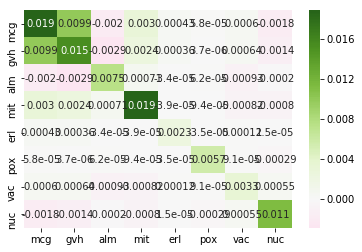

In [20]:
covariation(yeast)

In [21]:
min_max_each_attr(yeast)

seq_name 6P2K_YEAST ZUO1_YEAST
mcg 0.11 1.0
gvh 0.13 1.0
alm 0.21 1.0
mit 0.0 1.0
erl 0.5 1.0
pox 0.0 0.83
vac 0.0 0.73
nuc 0.0 1.0
class CYT VAC


#### Yeast results
All of the attributes have low correlation and low covariantion with each other, which is rather good because each of them provides new information to be analyzed. It is unknown if they have also low correlation with 'class' attribute, because it is not a numeric attribute. 